In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.core.display_functions import display

input_OysterLinkIndex="resources/LinkIndex.tsv"
input_DWMLinkIndex="resources/DWMLinkindex.csv"
# Cleaning the Oyster Output file(LinkIndex.tsv)
df_Linkindex = pd.read_csv(input_OysterLinkIndex, sep='\t')
df_Linkindex = df_Linkindex.drop('Rule', axis=1)
df_Linkindex['RefID'] = df_Linkindex['RefID'].str.removeprefix('TWK.')

## Create a column - Size of CLuster with Frequency (no of times occured) of OysterID
# it says how many records exist in a single oyster ID
df_Linkindex['freq_size'] = df_Linkindex.groupby('OysterID')['OysterID'].transform('count')

#Dictionary 1:
# key : Rec ID
# value: Oyster clusterID(from lenient Link Index)
dict1 = pd.Series(df_Linkindex['OysterID'].values,index=df_Linkindex['RefID']).to_dict()

#Dictionary 2:
# key : Oyster cluster ID and
# value : size of the cluster (like a cluster profile)
dict2 = pd.Series(df_Linkindex['freq_size'].values,index=df_Linkindex['OysterID']).to_dict()

# Cleaning the DWM Output file(DWMLinkindex.csv)
df_dwm = pd.read_csv(input_DWMLinkIndex)
df_dwm = df_dwm.drop('References',axis=1)

#Dictionary 3:
# Key :  DWM clusterID
# Value : RecID
dict3 = df_dwm.groupby('ClusterID')['RecID'].apply(list).to_dict()

dict4=dict()
IdenticalDWMClusters=list()
IdenticalDWMClusters_distributionBy_size=dict()

# lookup of OysterIDs
for clusterID, RecIDs in dict3.items():
    oysterID_PerClusterID = set()
    print(f"ClusterID {clusterID} -> RecID-List {RecIDs}")
    for i in RecIDs:
        oysterID = dict1.get(i)
        print(f"RecID {i} -> dict2 Oyster {oysterID}")
        oysterID_PerClusterID.add(oysterID)             #for unique oyster ID
        dict4[clusterID] = oysterID_PerClusterID

# validation of Size
for key, OysterIdSet in dict4.items():     # key=clusterID  and value=OysterIdSet
    if (len(OysterIdSet)> 1):
        print(f"DWM and Oyster Cluster - Dont Match for DWM ClusterID : {key}")
    else:
        print(f"DWM and Oyster Cluster - Match for DWM ClusterID : {key}")
        oysterID = next(iter(OysterIdSet))
        sizeOfOysterCluster = dict2.get(oysterID)
        print(f"Size of OysterCluster : {sizeOfOysterCluster}")
        DWMCluster = dict3.get(key)               # key=clusterID
        sizeOfDWMCluster = len(DWMCluster)
        print(f"Size of DWMCluster : {sizeOfDWMCluster}")
        print("*"*40)
        if(sizeOfOysterCluster == sizeOfDWMCluster):
            print(f"Identical Clusters DWM ClusterID- {key}")
            IdenticalDWMClusters.append(key)
            IdenticalDWMClusters_distributionBy_size[key] = sizeOfOysterCluster    #IdenticalDWMClusters_distributionBy_size(key,value)= clusterID, sizeOfOysterCluster


print(f"Number of Identical Clusters {len(IdenticalDWMClusters)}")
print(f"Total Number of DWM Clusters - {len(dict3.keys())}")
print(f"Total Number of Oysters Clusters - {len(dict2.keys())}")
print("Identical DWMClusters Profile")
display(IdenticalDWMClusters_distributionBy_size)

dict_groupedBySize = defaultdict(list)            #IdenticalDWMClusters=list()
for key, val in sorted(IdenticalDWMClusters_distributionBy_size.items()):
    dict_groupedBySize[val].append(key)
# printing Grouped dict
print(f"Grouped dictionary is : {str(dict(dict_groupedBySize))}")


dict5= dict()
for key, value in dict(dict_groupedBySize).items():
    dict5[key] = len(value)
print(f"Identical Cluster Profile {dict5}")

plt.title("Distribution Profile of Identical DWM vs OysterCluster Results")
plt.xlabel("No of ClusterIDs")
plt.ylabel("Size of Each Cluster")

# creating the bar plot
plt.bar(list(dict5.keys()), dict5.values(), color='g')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'resources/LinkIndex.tsv'

### Oyster Cluster Profile

In [10]:
series_OysterProfile = df_Linkindex.groupby('freq_size')['OysterID'].nunique()
df_OysterProfile = pd.DataFrame(series_OysterProfile.reset_index(name = "OysterProfile_noOfClusters"))
df_OysterProfile = df_OysterProfile.rename(columns={'freq_size': 'OysterProfile_size'})
df_OysterProfile

OysterProfile_size  OysterProfile_noOfClusters
0                    1                       11575
1                    2                        2198
2                    3                         720
3                    4                         264
4                    5                         129
5                    6                          84
6                    7                          52
7                    8                          40
8                    9                          27
9                   10                          19
10                  11                           8
11                  12                          10
12                  13                           7
13                  14                           6
14                  15                           3
15                  16                          11
16                  17                           5
17                  18                           5
18                  19                           1
19                  20                           6
20                  21                           3
21                  22                           4
22                  23                           5
23                  24                           2
24                  26                           1
25                  27                           1
26                  28                           1
27                  29                           2
28                  30                           2
29                  31                           2
30                  32                           2
31                  34                           1
32                  40                           1
33                  42                           1
34                  44                           1
35                  47                           1
36                  48                           2
37                  59                           1
38                  64                           1
39                  95                           1
40                 105                           1
41                 158                           2
42                 193                           1
43                 271                           1

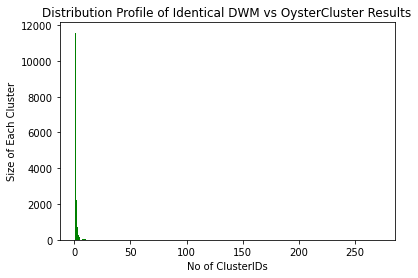

In [11]:
plt.title("Distribution Profile of Identical DWM vs OysterCluster Results")
plt.xlabel("No of ClusterIDs")
plt.ylabel("Size of Each Cluster")

# creating the bar plot
plt.bar(df_OysterProfile["OysterProfile_size"], df_OysterProfile["OysterProfile_noOfClusters"], color='g')
plt.show()

## DWM Cluster profile

In [12]:
df_dwm = df_dwm.drop('RecID', axis=1)

In [13]:
df_dwm['freq_size'] = df_dwm.groupby('ClusterID')['ClusterID'].transform('count')
series_DWMProfile = df_dwm.groupby('freq_size')['ClusterID'].nunique()
df_DWMProfile = pd.DataFrame(series_DWMProfile.reset_index(name = "DWMProfile_noOfClusters"))
df_DWMProfile = df_DWMProfile.rename(columns={'freq_size': 'DWMProfile_size'})
df_DWMProfile

DWMProfile_size  DWMProfile_noOfClusters
0                 1                    17159
1                 2                     1386
2                 3                      378
3                 4                      148
4                 5                       71
5                 6                       43
6                 7                       22
7                 8                       18
8                 9                       13
9                10                        8
10               11                        9
11               12                        7
12               13                        7
13               14                        6
14               15                        3
15               16                        1
16               17                        5
17               18                        4
18               19                        1
19               21                        1
20               22                        1
21               23                        1
22               24                        1
23               25                        2
24               27                        1
25               28                        1
26               29                        1
27               31                        1
28               33                        1
29               34                        2
30               36                        1
31               41                        1
32               42                        1
33               50                        1
34               53                        1
35               67                        1
36               75                        1
37               78                        1
38               93                        1
39              165                        1

In [14]:
## size   Identical clusters       oyster clusters             DWM clusters
df_IdenticalClusterProfile = pd.DataFrame(list(dict5.items()), columns=['IdenticalClusterProfile_size', 'IdenticalClusterProfile_NoOfClusters'])
print(pd.concat([df_DWMProfile, df_OysterProfile, df_IdenticalClusterProfile ],axis=1))

    DWMProfile_size  DWMProfile_noOfClusters  OysterProfile_size  \
0               1.0                  17159.0                   1   
1               2.0                   1386.0                   2   
2               3.0                    378.0                   3   
3               4.0                    148.0                   4   
4               5.0                     71.0                   5   
5               6.0                     43.0                   6   
6               7.0                     22.0                   7   
7               8.0                     18.0                   8   
8               9.0                     13.0                   9   
9              10.0                      8.0                  10   
10             11.0                      9.0                  11   
11             12.0                      7.0                  12   
12             13.0                      7.0                  13   
13             14.0                      6.0    

In [15]:
df_report = pd.concat([df_DWMProfile, df_OysterProfile, df_IdenticalClusterProfile ],axis=1)
df_report

DWMProfile_size  DWMProfile_noOfClusters  OysterProfile_size  \
0               1.0                  17159.0                   1   
1               2.0                   1386.0                   2   
2               3.0                    378.0                   3   
3               4.0                    148.0                   4   
4               5.0                     71.0                   5   
5               6.0                     43.0                   6   
6               7.0                     22.0                   7   
7               8.0                     18.0                   8   
8               9.0                     13.0                   9   
9              10.0                      8.0                  10   
10             11.0                      9.0                  11   
11             12.0                      7.0                  12   
12             13.0                      7.0                  13   
13             14.0                      6.0                  14   
14             15.0                      3.0                  15   
15             16.0                      1.0                  16   
16             17.0                      5.0                  17   
17             18.0                      4.0                  18   
18             19.0                      1.0                  19   
19             21.0                      1.0                  20   
20             22.0                      1.0                  21   
21             23.0                      1.0                  22   
22             24.0                      1.0                  23   
23             25.0                      2.0                  24   
24             27.0                      1.0                  26   
25             28.0                      1.0                  27   
26             29.0                      1.0                  28   
27             31.0                      1.0                  29   
28             33.0                      1.0                  30   
29             34.0                      2.0                  31   
30             36.0                      1.0                  32   
31             41.0                      1.0                  34   
32             42.0                      1.0                  40   
33             50.0                      1.0                  42   
34             53.0                      1.0                  44   
35             67.0                      1.0                  47   
36             75.0                      1.0                  48   
37             78.0                      1.0                  59   
38             93.0                      1.0                  64   
39            165.0                      1.0                  95   
40              NaN                      NaN                 105   
41              NaN                      NaN                 158   
42              NaN                      NaN                 193   
43              NaN                      NaN                 271   

    OysterProfile_noOfClusters  IdenticalClusterProfile_size  \
0                        11575                           1.0   
1                         2198                           4.0   
2                          720                           2.0   
3                          264                           6.0   
4                          129                           3.0   
5                           84                           7.0   
6                           52                           9.0   
7                           40                          22.0   
8                           27                          11.0   
9                           19                          23.0   
10                           8                           5.0   
11                          10                          14.0   
12                           7                          17.0   
13                           6                 

In [16]:
output = "output/report.xlsx"
df_report.to_excel(output, header=True, index=False, encoding='utf-8', na_rep='None')